<a href="https://colab.research.google.com/github/qonca/traditional_ml/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m,3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 +0.5) * 2 * np.pi
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5
X +=0.28 *np.random.randn(m,3)
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X+=[0.2, 0, 0.2]

In [ ]:
X.shape

(60, 3)

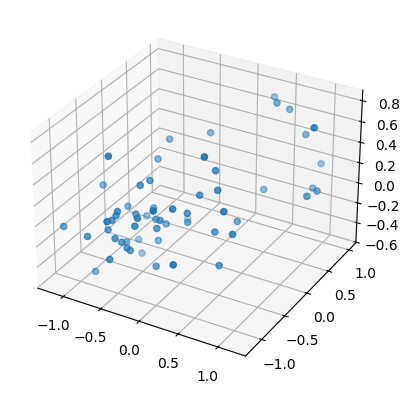

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(X[:,0], X[:,1], X[:,2]);

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

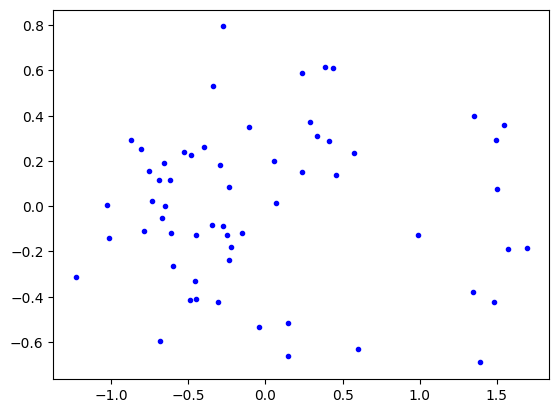

In [ ]:
plt.plot(X2D[:,0], X2D[:,1], 'b.')

In [ ]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [ ]:
1 - pca.explained_variance_ratio_.sum()

0.09028309326742034

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml('mnist_784', as_frame = False, parser = 'auto')

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
#sutun sayi = dimension
#accumulative sum = ozu+ozune qederkilerin cemi

In [ ]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [ ]:
cumsum = np.cumsum (pca.explained_variance_ratio_)#accumulative sum
d = np.argmax(cumsum>=0.95) + 1
d

154

In [ ]:
cumsum
#600 sutun sildik amma 95% melumat hele elimizdedir

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

In [ ]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

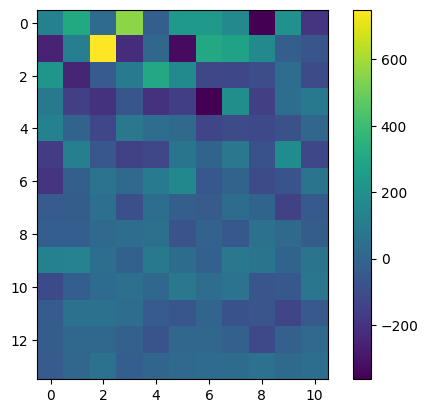

In [ ]:
plt.imshow(X_reduced[0].reshape(14,11));
plt.colorbar();
#pixel sayini azaltdiq

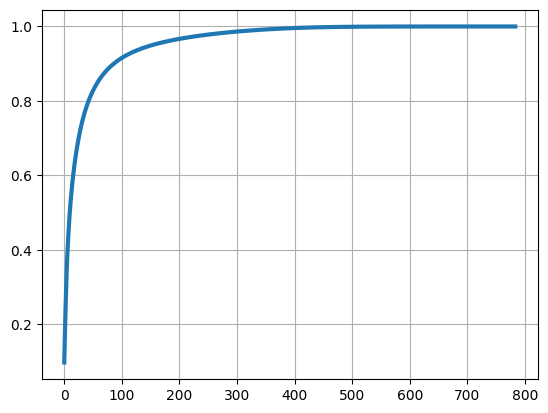

In [ ]:
plt.plot(cumsum, linewidth = 3)
plt.grid();

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
#data cox boyuk olduqda

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

clf = make_pipeline(PCA(random_state = 42),
                    RandomForestClassifier(random_state = 42))

params = {
    "pca__n_components" : np.arange(10,80),
    "randomforestclassifier__n_estimators": np.arange(50,500)
}

search_cv = RandomizedSearchCV(clf, params, n_iter = 10, cv =3, random_state =42)
search_cv.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

#LLE ->Locally Linear Embedding

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10, random_state = 42)
X_reduced = lle.fit_transform(X_swiss)

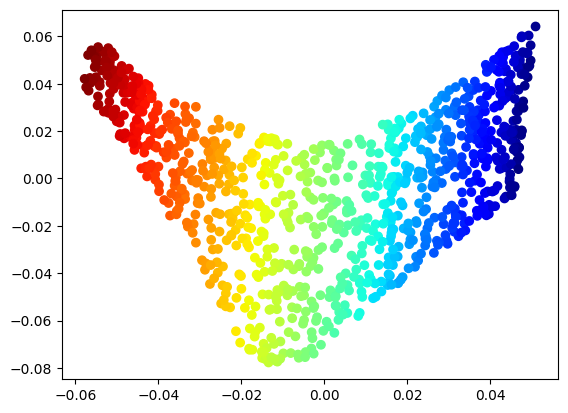

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = t, cmap = "jet");

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(X_swiss)

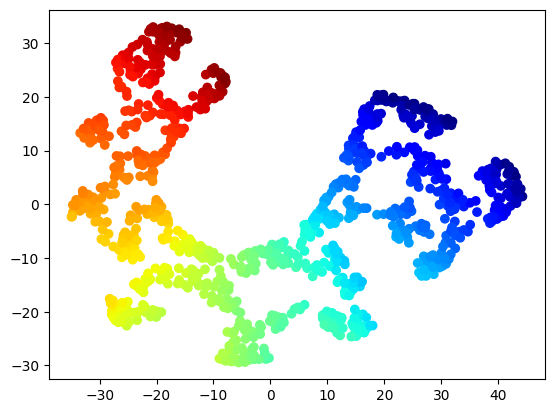

In [ ]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = t, cmap = "jet");

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vetrirah/customer")

print("Path to dataset files:", path)

100%|██████████| 105k/105k [00:00<00:00, 21.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vetrirah/customer/versions/1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Train.csv')

In [ ]:
df


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Segmentation', axis = 1)
y = df['Segmentation'].copy()

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_nums = X_train.select_dtypes(include = [np.number]).columns
X_cats = X_train.select_dtypes(exclude = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = "most_frequent")),
    ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
])

full_pipeline= ColumnTransformer([
    ('num', num_pipeline, X_nums),
    ('cat', cat_pipeline, X_cats)
], remainder = 'passthrough')


In [ ]:
full_pipeline.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object'))])

In [ ]:
X_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
6789,463934,Female,Yes,43,Yes,Artist,3.0,Average,2.0,Cat_6
1309,464871,Female,No,28,Yes,Entertainment,6.0,Low,3.0,Cat_4
8036,461612,Female,No,31,Yes,Healthcare,8.0,Low,5.0,Cat_6
630,461668,Male,Yes,50,Yes,Artist,3.0,Average,4.0,Cat_2
4476,463335,Male,No,27,Yes,Doctor,NaN,Low,1.0,Cat_4
...,...,...,...,...,...,...,...,...,...,...
7941,462519,Male,No,22,No,Healthcare,1.0,Low,5.0,Cat_4
4196,467966,Female,No,31,Yes,Entertainment,9.0,Low,3.0,Cat_7
7900,462751,Male,No,31,No,Healthcare,3.0,Low,9.0,Cat_6
504,467492,Female,Yes,57,Yes,Doctor,1.0,Low,2.0,Cat_7


In [ ]:
df.shape

(8068, 11)

In [ ]:
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)




SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-12-328c290dc04b>, line 4)

In [ ]:
plt.imshow(X_reduced[0].reshape(14,11));
plt.colorbar();
#pixel sayini azaltdiq